# Solving the 1-D Schrodinger Equation
$$ i \hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2\psi}{\partial x^2} + V(x)\psi $$

## Discretization (after dimensional analysis)

$$ i \frac{d\phi}{dt} = H \phi $$

where

$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  


Formal solution:  

$$ \phi(t) = e^{-i H t} \phi(0) $$

Strategy:  
1. Solve for eigenvalues and eigenvectors of $H$  

$$ H \phi_n = \epsilon_n \phi_n $$  

2. Expand $\phi(0)$ in the basis of eigenvectors  

$$ \phi(0) = \sum_n c_n \phi_n $$  
where $c_n = \phi_n^{\dagger} \phi(0)$  

3. The state $\phi(t)$ is then given by  

\begin{eqnarray*}
\phi(t) &=& e^{-i H t} \phi(0) \\
&=& \sum_n c_n e^{-i\epsilon_n t}\phi_n
\end{eqnarray*}

## Example: Time evolution of free particle

Initial wavefunction: Gaussian


In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [2]:
delta = 0.1
L = 10.
N = 100
dimension = 2*N + 1 # Number of lattice points.
x = np.linspace(-L,L,2*N+1)


In [3]:
def kronecker(i,j):
    return 1 if i==j else 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2

In [4]:
def kronecker(i,j):
    return 1 if i==j else 0

def V(z):
    return 0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [5]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [6]:
###### The initial Gaussian wavefunction ##########
a = 1.0 ## Initial spread in units of l0
b = 0.0 ## Initial peak of the Gaussian
p0 = 0.0 ## Mean momentum in units of hbar/l0

In [22]:
def psi0(y):
    return (1/pow(np.pi*(a**2),0.25))*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*p0*y)

C:\Users\pankh\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


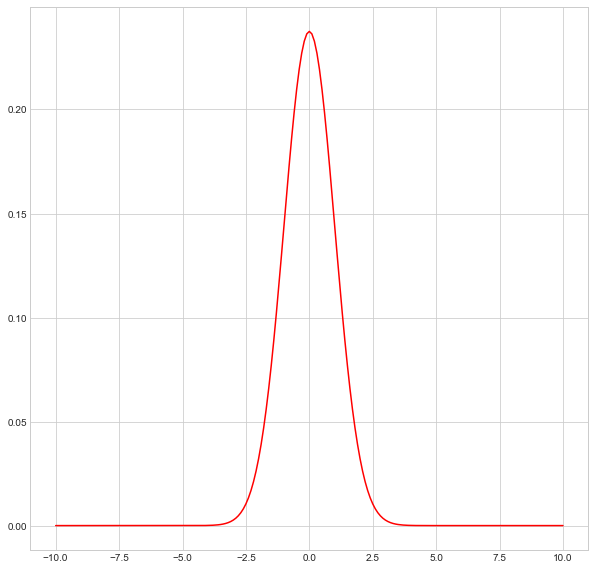

In [25]:
x= np.linspace(-L,L,2*N+1)
plt.figure(figsize=(10,10))
Psi0_m= np.sqrt(delta)*psi0(x)
plt.plot(x, Psi0_m,'r')

# **Find all $c_i= <\phi_i|\psi(x,0)>$**

In [34]:
def c(i):
  c = np.vdot(Psi0_m, H_eigenvectors[:,i]) # nth expansion coefficient
  return c

Show that $|\psi(x,0)> = \sum c_i *|\phi_i> $

(-3.0, 3.0)

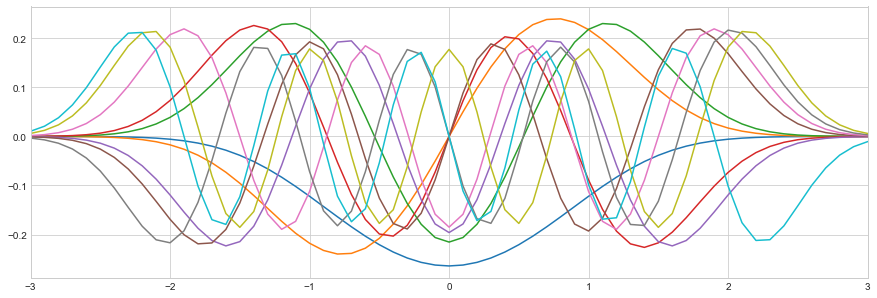

In [35]:
plt.figure(figsize=(15,5))
for i in range(10): # keep changing number and plot independent statevectors
  plt.plot(x,H_eigenvectors[:,i])
plt.xlim(-3,3)

C:\Users\pankh\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\pankh\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


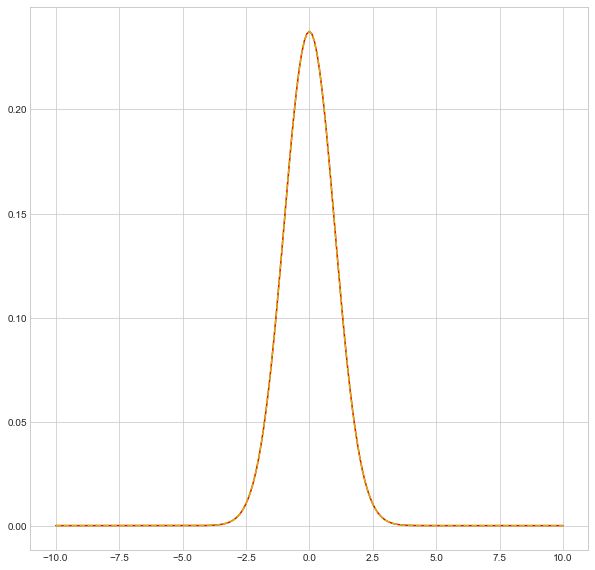

In [36]:
sum = np.zeros(dimension, 'complex')
plt.figure(figsize=(10,10))
for i in range(dimension):
  ci = c(i) # nth expansion coefficient
  sum += ci *  H_eigenvectors[:,i]

plt.plot(x,sum,'r')
plt.plot(x, Psi0_m,'y',linestyle='dashed')


# Show that $|\psi(x,t)> = \sum c_i e^{-iEt} |\phi_i> $

In [39]:
def Psi(t):
    sum = np.zeros(dimension, 'complex')
    for n in range(dimension):
        c = np.vdot(Psi0_m, H_eigenvectors[:,n]) # nth expansion coefficient
        E = H_eigenvalues[n]
        sum += c * np.exp(-E*t*1.0j) * H_eigenvectors[:,n]
    return sum

def Prob(t):
    return np.array( [abs(Psi(t)[i])**2 for i in range(dimension)] )

# **Plot the wavefunctions at different times**

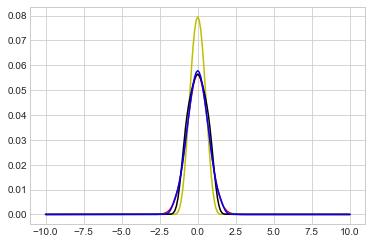

In [40]:
plt.plot(x, Prob(0),'r')
plt.plot(x, Prob(0.5),'y')
plt.plot(x, Prob(1.),'k')
plt.plot(x, Prob(100),'b')

# **Using ipywidgets to create the interactive plots**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Define the function to plot (you can replace this with your own function)
def plot_function(t=0.0):
    x= np.linspace(-L,L,2*N+1)  # Define the x-range
    y = Prob(t)  # Example: Linear function ax + b

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'{t}')
    plt.title('Dynamic Function Plot')
    plt.ylim(0,0.06)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive sliders for function parameters
interact(
    plot_function,
    t=widgets.FloatSlider(value=0.0, min=0.0, max=100.0, step=1, description='t')
)


interactive(children=(FloatSlider(value=0.0, description='t', step=1.0), Output()), _dom_classes=('widget-inte…

<function __main__.plot_function(t=0.0)>